In [1]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('/Users/jvonderhoff/Desktop/FantasyFootball/2024/prod_bestball_2024.db')

query = "SELECT * FROM DK_lineups"
query2 = "SELECT * FROM Underdog_lineups"
df = pd.read_sql(query, conn)
df2 = pd.read_sql(query2, conn)

In [2]:
unique_lineup_ids = df['lineup_ID'].nunique()
print("Number of unique lineup_ID values:", unique_lineup_ids)

unique_DraftEntry = df2['DraftEntry'].nunique()
print("Number of unique DraftEntry values:", unique_DraftEntry)



Number of unique lineup_ID values: 27
Number of unique DraftEntry values: 52


In [3]:
unique_count_per_site = df.groupby('contest_site')['lineup_ID'].nunique()
print(unique_count_per_site)

contest_site
Draftkings    27
Name: lineup_ID, dtype: int64


In [4]:
unique_count_per_site_name = df.groupby(['contest_site', 'contest_name'])['lineup_ID'].nunique()
print(unique_count_per_site_name)

contest_site  contest_name   
Draftkings    Best Ball Milly     6
              Fourth Down II      2
              Play Action        19
Name: lineup_ID, dtype: int64


# Money Spent
Underdog credit
1. 25 dollar deposit Bonus
2. 25 dollar Legup Credit

DraftKings Credit
1. 1 free entry into Milly

Money Spent
1. 99 dollars for a year of legup
2. 4.99 a month started beginning of May

In [5]:
total_spent_per_lineup = df.drop_duplicates('lineup_ID')['contest_entryFee'].sum()
print(total_spent_per_lineup)

185


In [6]:
total_spent_per_lineup_site = df.drop_duplicates('lineup_ID').groupby(['lineup_ID', 'contest_site'])['contest_entryFee'].sum().reset_index()
total_spent_per_site = total_spent_per_lineup_site.groupby('contest_site')['contest_entryFee'].sum()
print(total_spent_per_site)

contest_site
Draftkings    185
Name: contest_entryFee, dtype: int64


In [7]:
total_spent_per_lineup = df.drop_duplicates('lineup_ID').groupby(['lineup_ID', 'contest_name'])['contest_entryFee'].sum().reset_index()
total_spent_per_contest = total_spent_per_lineup.groupby('contest_name')['contest_entryFee'].sum()
print(total_spent_per_contest)

contest_name
Best Ball Milly    120
Fourth Down II       8
Play Action         57
Name: contest_entryFee, dtype: int64


In [8]:
UD_total_spent = df2.drop_duplicates('DraftEntry')['TournamentEntryFee'].sum()
print(UD_total_spent)

total_spent_per_lineup = df.drop_duplicates('lineup_ID')['contest_entryFee'].sum()
print(total_spent_per_lineup)

311.0
185


In [9]:
UD_total_spent_per_lineup = df2.drop_duplicates('DraftEntry').groupby(['DraftEntry', 'TournamentTitle'])['TournamentEntryFee'].sum().reset_index()
UD_total_spent_per_contest = UD_total_spent_per_lineup.groupby('TournamentTitle')['TournamentEntryFee'].sum()
print(UD_total_spent_per_contest)

TournamentTitle
Best Ball Mania V       50.0
The Chihuahua 3         16.0
The Fast Puppy          40.0
The Mini Schnauzer 2     6.0
The Mini Schnauzer 3    12.0
The Mini Schnauzer 4    21.0
The Mini Schnauzer 5     6.0
The Poodle              84.0
The Pug 2               36.0
The Puppy 2             40.0
Name: TournamentEntryFee, dtype: float64


# Underdog Lineup Analysis

In [10]:
# Filter lineups where player_position = 'QB'
qb_lineups = df2[df2['Position'] == 'QB']

# Create a new column 'FullName' by combining 'FirstName' and 'LastName'
df2['FullName'] = df2['FirstName'] + ' ' + df2['LastName']

# Count the occurrences of player names where player_position = 'QB'
qb_player_counts = qb_lineups['FullName'].value_counts()

# Print the QB player counts
print("QB Player Counts:")
print(qb_player_counts)

KeyError: 'FullName'

In [11]:
# Filter lineups where player_position = 'QB'
qb_lineups = df2[df2['Position'] == 'QB']

# Create a new column 'FullName' by combining 'FirstName' and 'LastName'
df2['FullName'] = df2['FirstName'] + ' ' + df2['LastName']

# Count the occurrences of player names where player_position = 'QB'
qb_player_counts = qb_lineups['FullName'].value_counts()

# Print the QB player counts
print("QB Player Counts:")
print(qb_player_counts)

QB Player Counts:
Matthew Stafford      8
Caleb Williams        7
Brock Purdy           7
Jordan Love           6
Derek Carr            6
Tua Tagovailoa        6
Kirk Cousins          5
Geno Smith            5
Trevor Lawrence       5
Jayden Daniels        5
Baker Mayfield        4
Bryce Young           4
Josh Allen            4
Patrick Mahomes       4
Lamar Jackson         4
Aaron Rodgers         4
Anthony Richardson    4
C.J. Stroud           4
Joe Burrow            4
Jalen Hurts           3
Will Levis            3
Drake Maye            3
Jared Goff            3
Kyler Murray          3
Deshaun Watson        2
Justin Herbert        2
Russell Wilson        2
Dak Prescott          2
Bo Nix                2
Aidan O'Connell       1
Justin Fields         1
Daniel Jones          1
J.J. McCarthy         1
Gardner Minshew II    1
Name: FullName, dtype: int64


In [12]:
# Filter lineups where player_position = 'RB'
rb_lineups = df2[df2['Position'] == 'RB']

# Create a new column 'FullName' by combining 'FirstName' and 'LastName'
df2['FullName'] = df2['FirstName'] + ' ' + df2['LastName']

# Count the occurrences of player names where player_position = 'QB'
rb_player_counts = rb_lineups['FullName'].value_counts()

# Print the rb player counts
print("RB Player Counts:")
print(rb_player_counts)



RB Player Counts:
Austin Ekeler          11
Zack Moss               9
Rico Dowdle             9
Rhamondre Stevenson     9
Jaylen Warren           9
                       ..
Chuba Hubbard           1
Khalil Herbert          1
Breece Hall             1
Saquon Barkley          1
Kyren Williams          1
Name: FullName, Length: 64, dtype: int64


In [13]:
# Filter lineups where player_position = 'wr'
wr_lineups = df2[df2['Position'] == 'WR']

# Create a new column 'FullName' by combining 'FirstName' and 'LastName'
df2['FullName'] = df2['FirstName'] + ' ' + df2['LastName']

# Count the occurrences of player names where player_position = 'QB'
wr_player_counts = wr_lineups['FullName'].value_counts()

# Print the wr player counts
print("wr Player Counts:")
print(wr_player_counts)



wr Player Counts:
Drake London          10
Zay Flowers           10
Adam Thielen          10
Adonai Mitchell        9
Jaxon Smith-Njigba     9
                      ..
Chase Claypool         1
A.J. Brown             1
DJ Chark Jr.           1
Rashid Shaheed         1
Christian Watson       1
Name: FullName, Length: 95, dtype: int64


In [14]:
# Filter lineups where player_position = 'te'
te_lineups = df2[df2['Position'] == 'TE']

# Create a new column 'FullName' by combining 'FirstName' and 'LastName'
df2['FullName'] = df2['FirstName'] + ' ' + df2['LastName']

# Count the occurrences of player names where player_position = 'QB'
te_player_counts = te_lineups['FullName'].value_counts()

# Print the te player counts
print("te Player Counts:")
print(te_player_counts)

te Player Counts:
Jonnu Smith          10
George Kittle         8
Trey McBride          8
Luke Musgrave         7
Mark Andrews          7
Chig Okonkwo          6
Tyler Conklin         6
Ben Sinnott           6
Sam LaPorta           5
Mike Gesicki          5
Kyle Pitts            4
Dawson Knox           4
Dallas Goedert        4
Noah Fant             4
Brock Bowers          4
Juwan Johnson         4
Hunter Henry          4
Travis Kelce          4
Dalton Schultz        3
Evan Engram           3
Jelani Woods          3
T.J. Hockenson        2
David Njoku           2
Tucker Kraft          2
Dalton Kincaid        2
Cade Otton            2
Cole Kmet             2
Colby Parkinson       2
Ja'Tavion Sanders     1
Michael Mayer         1
Zach Ertz             1
Name: FullName, dtype: int64


# DK Lineup Analysis

In [15]:
# Specify the desired player
desired_player = "Ja'Marr Chase"

# Filter lineups that include the desired player
filtered_lineups = df[df['player_name'] == desired_player]

# Print the lineup combinations for teams with the specific player
for lineup_id in filtered_lineups['lineup_ID'].unique():
    lineup = df[df['lineup_ID'] == lineup_id]['player_name'].tolist()
    print(f"Lineup {lineup_id}: {lineup}")

Lineup 7503db21-be71-4e4d-ba2b-e47bbcff570b: ["Ja'Marr Chase", 'Nico Collins', 'Cooper Kupp', 'Tee Higgins', 'Dalton Kincaid', 'Kenneth Walker III', 'George Kittle', 'Diontae Johnson', 'Tony Pollard', 'Devin Singletary', 'Matthew Stafford', 'Ezekiel Elliott', 'Jerome Ford', "Ja'Lynn Polk", 'Drake Maye', 'Marvin Mims Jr.', 'Bo Nix', 'Malik Washington', 'Dylan Laube', 'Jacoby Brissett']
Lineup d1729559-b42d-4533-85cc-742ba17b5d9c: ["Ja'Marr Chase", 'Chris Olave', 'Malik Nabers', 'Tee Higgins', 'Tank Dell', 'Rome Odunze', 'Kyler Murray', 'Jaylen Warren', 'Trey Benson', 'Brian Robinson Jr.', 'Chase Brown', 'Jerome Ford', 'Deshaun Watson', 'Michael Wilson', 'Xavier Legette', 'Bryce Young', 'Tyler Conklin', 'Noah Fant', 'Mike Gesicki', 'Dawson Knox']
Lineup a837181d-86db-4209-aaa1-c82156af5318: ["Ja'Marr Chase", 'Brandon Aiyuk', 'Deebo Samuel Sr.', 'Jalen Hurts', 'Trey McBride', 'Joe Burrow', 'Jordan Addison', 'Najee Harris', 'Javonte Williams', 'Courtland Sutton', 'Brian Robinson Jr.', 'Jer

In [16]:
# Get unique lineup IDs
unique_lineup_ids = df['lineup_ID'].unique()

# Loop through each lineup ID
for lineup_id in unique_lineup_ids:
    # Filter lineups for the current lineup ID and where draft_round is 1 or 2
    filtered_lineups = df[(df['lineup_ID'] == lineup_id) & ((df['draft_round'] == 1) | (df['draft_round'] == 2))]
    
    # Sort the lineups by draft_round
    sorted_lineups = filtered_lineups.sort_values('draft_round')
    
    # Get the draft picks and player names
    draft_picks = sorted_lineups['draft_round']
    player_names = sorted_lineups['player_name']
    
    
    # Print the lineup ID and draft picks with player names
    print(f"Lineup ID: {lineup_id}")
    for draft_pick, player_name in zip(draft_picks, player_names):
        print(f"Draft Round: {draft_pick}, Player Name: {player_name}")
    print()

Lineup ID: 7503db21-be71-4e4d-ba2b-e47bbcff570b
Draft Round: 1, Player Name: Ja'Marr Chase
Draft Round: 2, Player Name: Nico Collins

Lineup ID: 8b15b096-bb27-46d8-8723-3b2dd8702d6d
Draft Round: 1, Player Name: CeeDee Lamb
Draft Round: 2, Player Name: Kyren Williams

Lineup ID: c73fa1b1-97e1-429f-887f-8f6fa114817b
Draft Round: 1, Player Name: Bijan Robinson
Draft Round: 2, Player Name: Drake London

Lineup ID: 92d5fe6e-662b-4e09-ad1d-70c834cfb373
Draft Round: 1, Player Name: Amon-Ra St. Brown
Draft Round: 2, Player Name: Chris Olave

Lineup ID: d1729559-b42d-4533-85cc-742ba17b5d9c
Draft Round: 1, Player Name: Ja'Marr Chase
Draft Round: 2, Player Name: Chris Olave

Lineup ID: c64c8ad8-dbb4-4e9e-bf88-43ca89282be6
Draft Round: 1, Player Name: Breece Hall
Draft Round: 2, Player Name: Davante Adams

Lineup ID: 7ecab08b-04e3-4faf-8621-388459ab077e
Draft Round: 1, Player Name: Justin Jefferson
Draft Round: 2, Player Name: Chris Olave

Lineup ID: 341ae308-9744-4346-be5b-71f8404ca642
Draft Roun

In [17]:
# Filter lineups for draft_round 1 or 2
filtered_lineups = df[(df['draft_round'] == 1) | (df['draft_round'] == 2)]

# Group lineups by lineup_id and count unique combinations of draft_round
combinations = filtered_lineups.groupby('lineup_ID')['draft_round'].nunique()

# Count the total number of unique combinations
total_combinations = combinations.value_counts().sum()

# Print the number of different combinations of 1st and 2nd round picks
print(f"Number of Different Combinations: {total_combinations}")

Number of Different Combinations: 27


In [18]:
# Count the occurrences of all player names
player_counts = df['player_name'].value_counts()

# Print the player counts
print("Player Counts:")
print(player_counts)

Player Counts:
Noah Fant             10
Drake Maye             8
Christian Kirk         8
Malik Nabers           7
Brian Robinson Jr.     7
                      ..
Aaron Jones            1
Isaiah Likely          1
Keenan Allen           1
Gabe Davis             1
Parker Washington      1
Name: player_name, Length: 202, dtype: int64


In [19]:
# Filter lineups where player_position = 'QB'
qb_lineups = df[df['player_position'] == 'QB']

# Count the occurrences of player names where player_position = 'QB'
qb_player_counts = qb_lineups['player_name'].value_counts()

# Print the QB player counts
print("QB Player Counts:")
print(qb_player_counts)

QB Player Counts:
Drake Maye            8
Trevor Lawrence       5
Jayden Daniels        5
Brock Purdy           5
Kyler Murray          4
Jalen Hurts           4
Bryce Young           4
Matthew Stafford      3
Joe Burrow            3
Deshaun Watson        3
Aaron Rodgers         3
Lamar Jackson         3
Russell Wilson        2
Anthony Richardson    2
Justin Herbert        2
Geno Smith            2
Josh Allen            2
Sam Howell            1
Daniel Jones          1
Jordan Love           1
J.J. McCarthy         1
Tua Tagovailoa        1
Caleb Williams        1
Dak Prescott          1
Derek Carr            1
Bo Nix                1
Jacoby Brissett       1
Kirk Cousins          1
Gardner Minshew II    1
Name: player_name, dtype: int64


In [20]:
# Filter lineups where player_position = 'RB'
rb_lineups = df[df['player_position'] == 'RB']

# Count the occurrences of player names where player_position = 'QB'
rb_player_counts = rb_lineups['player_name'].value_counts()

# Print the rb player counts
print("RB Player Counts:")
print(rb_player_counts)

# Filter lineups where player_position = 'wr'
wr_lineups = df[df['player_position'] == 'WR']

# Count the occurrences of player names where player_position = 'QB'
wr_player_counts = wr_lineups['player_name'].value_counts()

# Print the wr player counts
print("wr Player Counts:")
print(wr_player_counts)

# Filter lineups where player_position = 'te'
te_lineups = df[df['player_position'] == 'TE']

# Count the occurrences of player names where player_position = 'QB'
te_player_counts = te_lineups['player_name'].value_counts()

# Print the te player counts
print("te Player Counts:")
print(te_player_counts)

RB Player Counts:
Jaylen Warren            7
Brian Robinson Jr.       7
Devin Singletary         6
Jaleel McLaughlin        5
MarShawn Lloyd           5
Zach Charbonnet          5
Najee Harris             5
Kendre Miller            5
Ty Chandler              5
Antonio Gibson           5
Trey Benson              5
Dylan Laube              5
Breece Hall              4
Kimani Vidal             4
D'Onta Foreman           4
Rico Dowdle              4
Jonathon Brooks          4
Jerome Ford              4
Ezekiel Elliott          4
Javonte Williams         3
Tony Pollard             3
Bucky Irving             3
Kenneth Walker III       3
Christian McCaffrey      3
Elijah Mitchell          3
Ray Davis                3
Trey Sermon              3
Audric Estime            3
Tyler Allgeier           3
David Montgomery         3
Zamir White              2
Zack Moss                2
Will Shipley             2
Jaylen Wright            2
Tyjae Spears             2
Blake Corum              2
Rhamondre 

Lineup ID: 1001ee2f-c5fa-4356-a79e-ab7b1206e699
Player Names: CeeDee Lamb, Jaylen Waddle, Chris Olave, Tank Dell, Christian Kirk, George Kittle, Kenneth Walker III, Jaylen Warren, Jonathon Brooks, Rashid Shaheed, Justin Herbert, Rico Dowdle, Kimani Vidal, Geno Smith, Noah Fant, Drake Maye, DJ Chark Jr., Roschon Johnson, Javon Baker, K.J. Osborn

Lineup ID: 47116c2d-fac0-4136-97f6-08dbda1d16f2
Player Names: A.J. Brown, Marvin Harrison Jr., DeVonta Smith, Jalen Hurts, Trey McBride, Marquise Brown, Kyler Murray, Najee Harris, Tony Pollard, Jonathon Brooks, Trey Benson, Jerry Jeudy, Ja'Lynn Polk, Kendre Miller, Antonio Gibson, Demarcus Robinson, Malachi Corley, Braelon Allen, Zach Ertz, Will Dissly

Lineup ID: 748782c2-2786-4c89-8874-c2a21d2ca01c
Player Names: Breece Hall, Jaylen Waddle, DK Metcalf, Tank Dell, Terry McLaurin, Rashee Rice, Xavier Worthy, Najee Harris, Brock Bowers, Trevor Lawrence, Jerome Ford, Zach Charbonnet, Kendre Miller, Demario Douglas, Hunter Henry, Russell Wilson, M

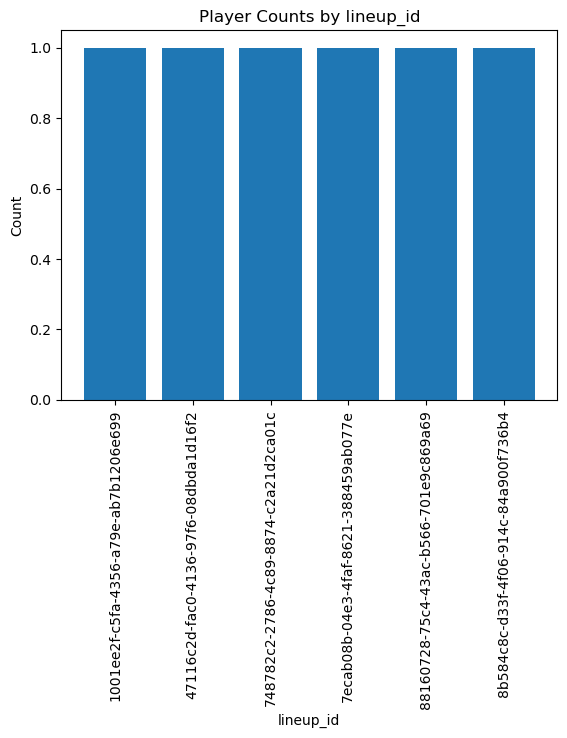

In [21]:
import matplotlib.pyplot as plt

# Specify the desired player
desired_contest = "Best Ball Milly"

# Filter lineups based on the desired contest
filtered_lineups = df[df['contest_name'] == desired_contest]

# Group the data by lineup_id and concatenate player_name values
grouped_data = filtered_lineups.groupby('lineup_ID')['player_name'].apply(', '.join)

# Print the player names by lineup_id
for lineup_id, player_names in grouped_data.items():
    print(f"Lineup ID: {lineup_id}")
    print(f"Player Names: {player_names}")
    print()

# Optional: Create a bar chart to visualize the data
lineup_counts = grouped_data.index.value_counts()

plt.bar(lineup_counts.index, lineup_counts.values)
plt.xlabel('lineup_id')
plt.ylabel('Count')
plt.title('Player Counts by lineup_id')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.show()

Jonathon Brooks       3
Deebo Samuel Sr.      2
Chris Olave           2
Rashid Shaheed        2
Jalen Hurts           2
                     ..
Pat Freiermuth        1
Cole Kmet             1
Brian Robinson Jr.    1
Courtland Sutton      1
K.J. Osborn           1
Name: player_name, Length: 90, dtype: int64


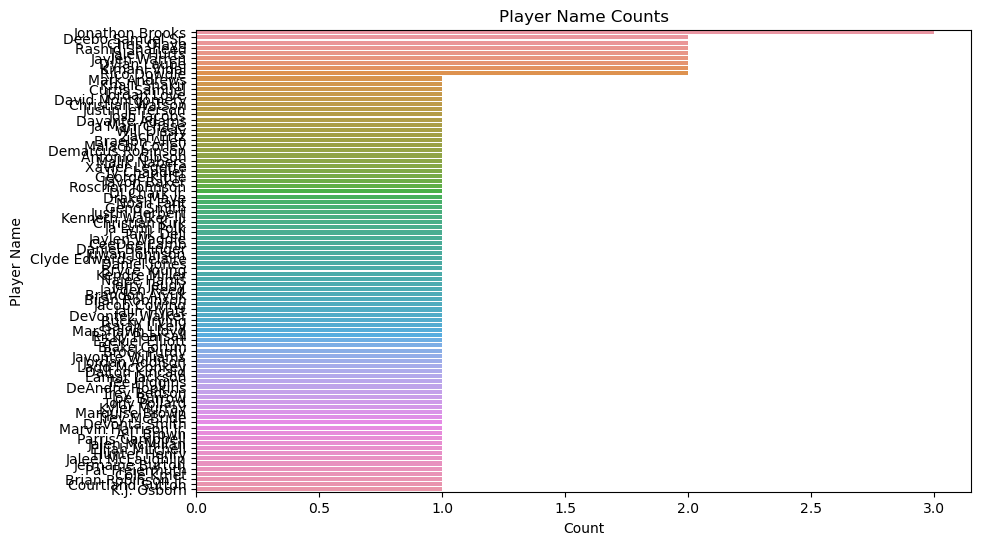

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the player names from the DataFrame
player_names = filtered_lineups['player_name']

# Analyze player names
player_name_counts = player_names.value_counts()

# Print the player name counts
print(player_name_counts)

# Plot the player name counts as a bar chart
plt.figure(figsize=(10, 6))
sns.countplot(y=player_names, order=player_name_counts.index)
plt.xlabel('Count')
plt.ylabel('Player Name')
plt.title('Player Name Counts')
plt.show()


In [119]:
# Sort the DataFrame by PickNumber
sorted_df = filtered_lineups.sort_values('draft_round')

# View player names by PickNumber
player_names_by_pick = sorted_df[['draft_round', 'player_name', 'player_position', 'lineup_ID']]
print(player_names_by_pick.to_string(index=False, max_rows=None))




 draft_round           player_name player_position                            lineup_ID
           1      Justin Jefferson              WR 7ecab08b-04e3-4faf-8621-388459ab077e
           1           CeeDee Lamb              WR 1001ee2f-c5fa-4356-a79e-ab7b1206e699
           1        Bijan Robinson              RB 8b584c8c-d33f-4f06-914c-84a900f736b4
           1         Ja'Marr Chase              WR 88160728-75c4-43ac-b566-701e9c869a69
           1            A.J. Brown              WR 47116c2d-fac0-4136-97f6-08dbda1d16f2
           2         Brandon Aiyuk              WR 8b584c8c-d33f-4f06-914c-84a900f736b4
           2         Jaylen Waddle              WR 1001ee2f-c5fa-4356-a79e-ab7b1206e699
           2         Davante Adams              WR 88160728-75c4-43ac-b566-701e9c869a69
           2           Chris Olave              WR 7ecab08b-04e3-4faf-8621-388459ab077e
           2   Marvin Harrison Jr.              WR 47116c2d-fac0-4136-97f6-08dbda1d16f2
           3         DeVonta Smi

In [125]:
import pandas as pd
from IPython.display import display

# Sort the DataFrame by PickNumber
sorted_df = filtered_lineups.sort_values('draft_round')

# View player names by PickNumber
player_names_by_pick = sorted_df[['draft_round', 'player_name', 'player_position', 'lineup_ID']]

# Display the table in Jupyter Notebook
display(player_names_by_pick)

,draft_round,player_name,player_position,lineup_ID
120,1,Justin Jefferson,WR,7ecab08b-04e3-4faf-8621-388459ab077e
500,1,CeeDee Lamb,WR,1001ee2f-c5fa-4356-a79e-ab7b1206e699
180,1,Bijan Robinson,RB,8b584c8c-d33f-4f06-914c-84a900f736b4
480,1,Ja'Marr Chase,WR,88160728-75c4-43ac-b566-701e9c869a69
460,1,A.J. Brown,WR,47116c2d-fac0-4136-97f6-08dbda1d16f2
...,...,...,...,...
499,20,Daniel Bellinger,TE,88160728-75c4-43ac-b566-701e9c869a69
199,20,Parris Campbell,WR,8b584c8c-d33f-4f06-914c-84a900f736b4
139,20,Jacob Cowing,WR,7ecab08b-04e3-4faf-8621-388459ab077e
479,20,Will Dissly,TE,47116c2d-fac0-4136-97f6-08dbda1d16f2


# Statistics

In [66]:
def calculate_jaccard_similarity(lineup1, lineup2):
    set1 = set(lineup1)
    set2 = set(lineup2)
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    jaccard_similarity = intersection / union
    return jaccard_similarity

# Extract player sets for two lineups (e.g., lineup 1 and lineup 2)
lineup1 = df.loc[df['lineup_ID'] == '7503db21-be71-4e4d-ba2b-e47bbcff570b', 'player_name'].tolist()
lineup2 = df.loc[df['lineup_ID'] == '8b15b096-bb27-46d8-8723-3b2dd8702d6d', 'player_name'].tolist()

# Calculate the Jaccard similarity
similarity = calculate_jaccard_similarity(lineup1, lineup2)
print("Jaccard Similarity:", similarity)

Jaccard Similarity: 0.05263157894736842


In [48]:
def calculate_jaccard_similarity(lineup1, lineup2):
    set1 = set(lineup1)
    set2 = set(lineup2)
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    jaccard_similarity = intersection / union
    return jaccard_similarity

# Extract unique lineup IDs
lineup_ids = df['lineup_ID'].unique()

# Calculate Jaccard similarity for all lineup pairs
similarities = []
for i in range(len(lineup_ids)):
    for j in range(i+1, len(lineup_ids)):
        lineup1 = df.loc[df['lineup_ID'] == lineup_ids[i], 'player_name'].tolist()
        lineup2 = df.loc[df['lineup_ID'] == lineup_ids[j], 'player_name'].tolist()
        similarity = calculate_jaccard_similarity(lineup1, lineup2)
        similarities.append((lineup_ids[i], lineup_ids[j], similarity))

# Convert similarities to DataFrame for easier analysis
similarities_df = pd.DataFrame(similarities, columns=['lineup1', 'lineup2', 'similarity'])
print(similarities_df)

                                  lineup1  \
0    7503db21-be71-4e4d-ba2b-e47bbcff570b   
1    7503db21-be71-4e4d-ba2b-e47bbcff570b   
2    7503db21-be71-4e4d-ba2b-e47bbcff570b   
3    7503db21-be71-4e4d-ba2b-e47bbcff570b   
4    7503db21-be71-4e4d-ba2b-e47bbcff570b   
..                                    ...   
248  cc7f7610-c018-4378-9619-e889722440b1   
249  cc7f7610-c018-4378-9619-e889722440b1   
250  0ab9e7a8-8e1e-409c-b3b8-113cdfec95ff   
251  0ab9e7a8-8e1e-409c-b3b8-113cdfec95ff   
252  56b0dd52-ec28-4c93-855b-96d03e962a4b   

                                  lineup2  similarity  
0    8b15b096-bb27-46d8-8723-3b2dd8702d6d    0.052632  
1    c73fa1b1-97e1-429f-887f-8f6fa114817b    0.081081  
2    92d5fe6e-662b-4e09-ad1d-70c834cfb373    0.025641  
3    d1729559-b42d-4533-85cc-742ba17b5d9c    0.081081  
4    c64c8ad8-dbb4-4e9e-bf88-43ca89282be6    0.000000  
..                                    ...         ...  
248  56b0dd52-ec28-4c93-855b-96d03e962a4b    0.081081  
249  0d26c9

In [49]:
# Extract unique lineup IDs
lineup_ids = df['lineup_ID'].unique()

# Calculate Jaccard similarity for all lineup pairs
similarities = []
for i in range(len(lineup_ids)):
    for j in range(i+1, len(lineup_ids)):
        lineup1 = df.loc[df['lineup_ID'] == lineup_ids[i], 'player_name'].tolist()
        lineup2 = df.loc[df['lineup_ID'] == lineup_ids[j], 'player_name'].tolist()
        similarity = calculate_jaccard_similarity(lineup1, lineup2)
        similarities.append((lineup_ids[i], lineup_ids[j], similarity))

# Convert similarities to DataFrame for easier analysis
similarities_df = pd.DataFrame(similarities, columns=['lineup1', 'lineup2', 'similarity'])

# Sort the DataFrame by similarity in descending order
similarities_df = similarities_df.sort_values(by='similarity', ascending=False)

# Print the top similar lineups and their shared players
num_top_lineups = 5  # Specify the number of top similar lineups you want to analyze
for index, row in similarities_df.head(num_top_lineups).iterrows():
    lineup1 = df.loc[df['lineup_ID'] == row['lineup1'], 'player_name'].tolist()
    lineup2 = df.loc[df['lineup_ID'] == row['lineup2'], 'player_name'].tolist()
    shared_players = list(set(lineup1) & set(lineup2))
    print(f"Lineup {row['lineup1']} and Lineup {row['lineup2']} have a Jaccard similarity of {row['similarity']}:")
    print(f"Shared Players: {shared_players}")
    print("-------")

Lineup 7ecab08b-04e3-4faf-8621-388459ab077e and Lineup 56b0dd52-ec28-4c93-855b-96d03e962a4b have a Jaccard similarity of 0.2903225806451613:
Shared Players: ['Bucky Irving', 'Jaylen Warren', 'Chris Olave', 'Brock Purdy', 'Ladd McConkey', 'Dalton Kincaid', 'Blake Corum', 'Dylan Laube', 'Ricky Pearsall']
-------
Lineup a837181d-86db-4209-aaa1-c82156af5318 and Lineup 8b584c8c-d33f-4f06-914c-84a900f736b4 have a Jaccard similarity of 0.25:
Shared Players: ['Brandon Aiyuk', 'Jalen Hurts', 'Courtland Sutton', 'Jermaine Burton', 'Brian Robinson Jr.', 'Hunter Henry', 'Joe Burrow', 'Deebo Samuel Sr.']
-------
Lineup 7ecab08b-04e3-4faf-8621-388459ab077e and Lineup 5800f56c-8272-4fb5-8697-8db05217b39a have a Jaccard similarity of 0.17647058823529413:
Shared Players: ['Bucky Irving', 'Ezekiel Elliott', 'Brock Purdy', 'Justin Jefferson', 'MarShawn Lloyd', 'Ricky Pearsall']
-------
Lineup d1729559-b42d-4533-85cc-742ba17b5d9c and Lineup fad11e73-c167-4db0-ab18-ecf6a98d339b have a Jaccard similarity of